<a href="https://colab.research.google.com/github/shaimayshah/fastaiwork/blob/master/AdidasNike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
tfms = get_transforms(do_flip=False)
path = '/content/drive/My Drive/classification/FootballClassification'
data = ImageDataBunch.from_folder(path, valid_pct=0.2, size=224).normalize(imagenet_stats)

In [0]:
data.classes

['Adidas', 'Nike']

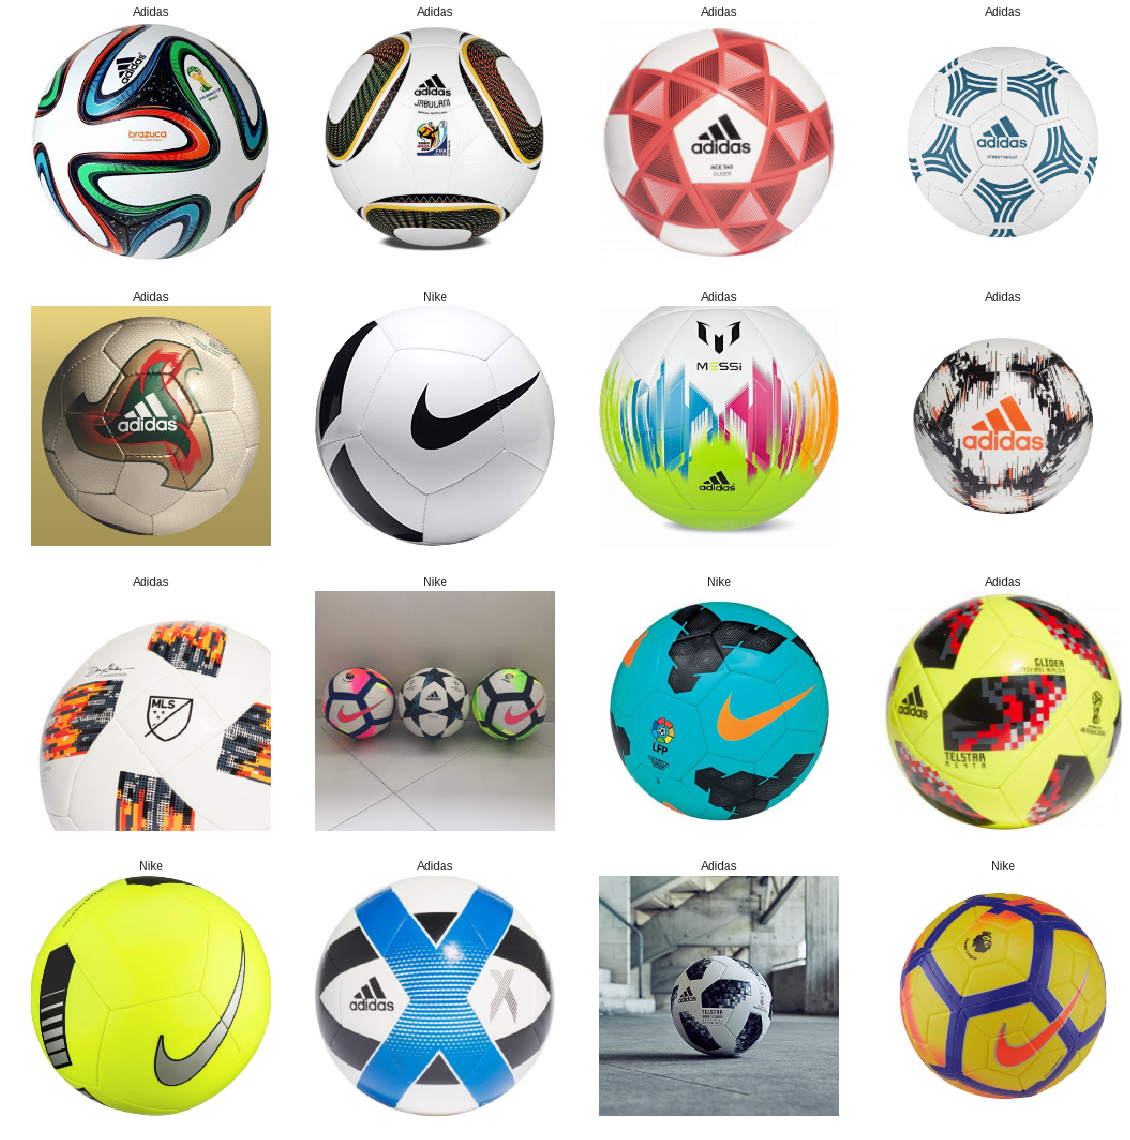

In [0]:
data.show_batch(rows=4)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.972479,0.771079,0.474576,00:41
1,0.734279,0.765106,0.372881,00:13
2,0.584974,0.723329,0.254237,00:16
3,0.487973,0.644182,0.220339,00:12


In [0]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.210680,0.593339,0.169492,00:12
1,0.207481,0.590483,0.152542,00:14
2,0.193082,0.557828,0.135593,00:14
3,0.158183,0.565620,0.118644,00:13
4,0.147384,0.582255,0.118644,00:12
5,0.138895,0.590394,0.118644,00:12
6,0.122938,0.596721,0.118644,00:15
7,0.113179,0.597879,0.118644,00:14


[('Adidas', 'Nike', 7)]

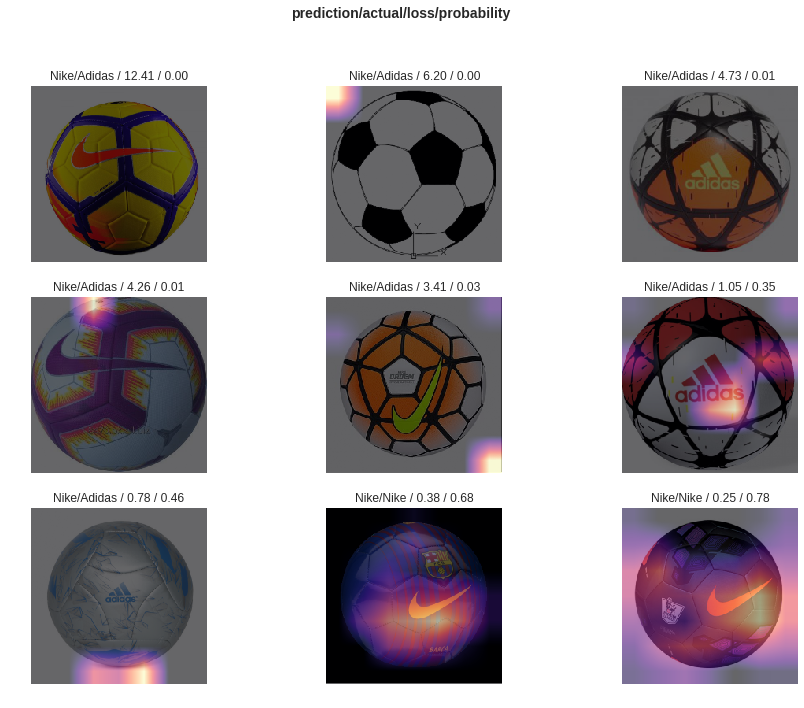

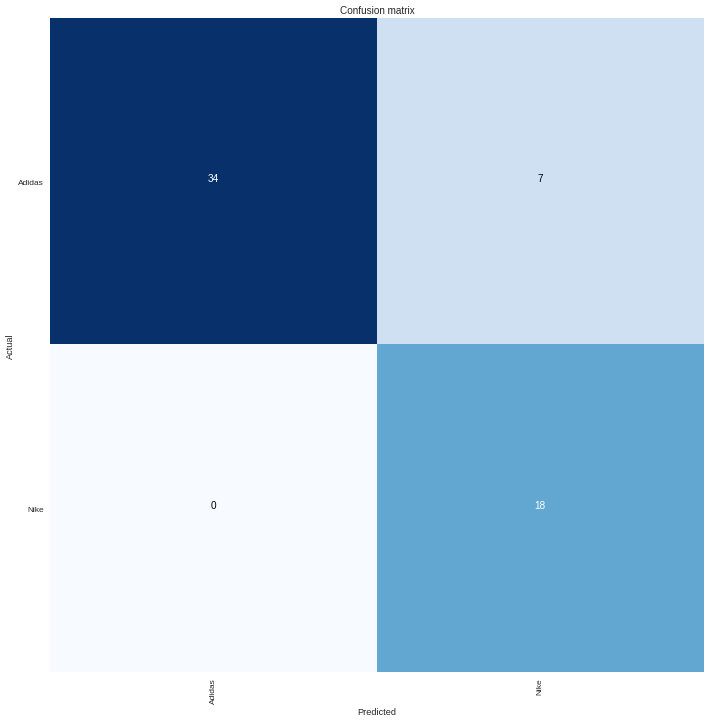

In [0]:
learn.save('stage-1')
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)
interp.plot_top_losses(9, figsize=(15,11))
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)
interp.most_confused(min_val=2)

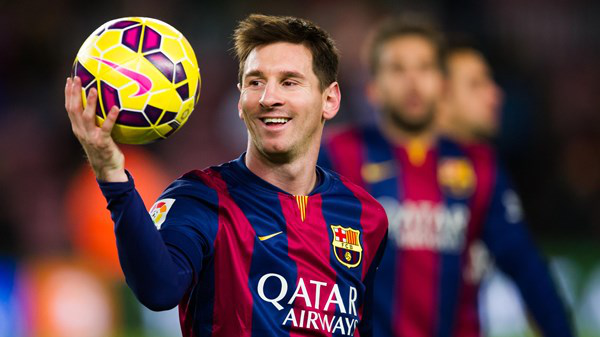

In [0]:
filename = '/content/drive/My Drive/example/KindaConfusing.jpg'
img = open_image(filename)
img

In [0]:
pred = learn.predict(img)
print(pred)

(Category Nike, tensor(1), tensor([0.0031, 0.9969]))


In [0]:
pred = learn.predict(img)
print(pred)

(Category Nike, tensor(1), tensor([0.0031, 0.9969]))


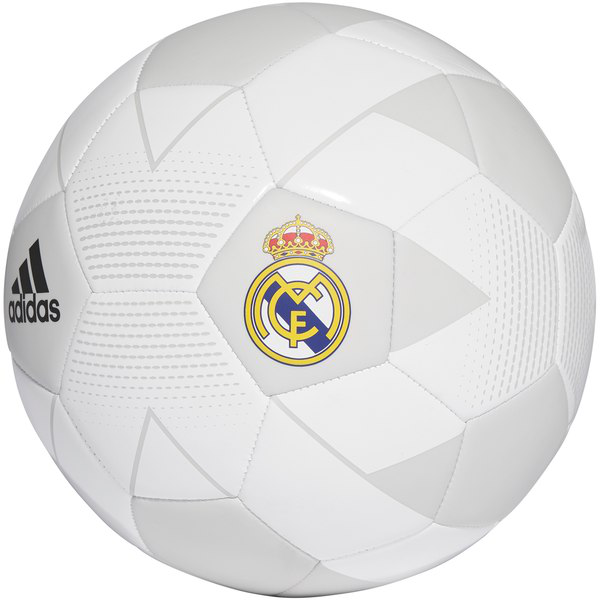

In [0]:
filename1 = '/content/drive/My Drive/example/thumb.jpeg'
img = open_image(filename1)
img

In [0]:
pred = learn.predict(img)
print(pred)

(Category Adidas, tensor(0), tensor([0.9729, 0.0271]))
